# Importamos librerías a utilizar

In [1]:
import networkx as nx
#Para dibujar redes y graficar funciones
import matplotlib.pyplot as plt
#Para generar errores aleatorios
import random

# (Actividad 1) Funciones para calcular métricas de robustez

Para diseñar las funciones solicitadas, debe utilizar los métodos ya diseñados en python para el calculo de componentes conectados de una red, ver https://networkx.org/documentation/stable/reference/algorithms/component.html.
Recuerde que la función len(A) le permite calcular el número de elementos en un conjunto o lista A.

Calcular el número de componentes conectados

In [2]:
def num_componentes_conectados(G):
    """
    Recive una red y regresa la cantidad de sus componentes.

    Parámetros
    ----------
    G : red
        red generada con NetworkX.

    Retorna
    -------
    num_cc : Entero
        número de componentes de la red.

    """
    
    return nx.number_connected_components(G)


Calcular la proporción del componente gigante con respecto al tamaño de la red original

In [3]:
def prop_componente_gigante(G, n):
    """
    Recibe una red y el número de nodos de esta y regresa la porporción del
    componente gigante.

    Parámetros
    ----------
    G : Red
        red generada con NetworkX.
    n : Entero
        Número de nodos de la red.

    Returns
    -------
    prop_gc : Flotante
        La proporción del componente gigante en relación al númmero de nodos
        original en la red.

    """
    
    # creamos un generador de componentes
    cc_gen = nx.connected_components(G)
    
    cc = [ ]
    len_cc = [ ]
    
    # almacenamos los componentes usando el generador, ademas de crear 
    # una lista de las longitudes de cada componente
    for i in cc_gen:
        cc.append(i)
        len_cc.append(len(i))
        
    # averiguamos cual es el inice del componete gigante en la lista
    gc_indice = len_cc.index(max(len_cc))
    
    # se calcula la proporción del componente gigante
    prop_gc = len(cc[gc_indice]) / n

    return prop_gc

# (Función a utilizar  en las actividades 5, 7 y 8) Funcion para gráficar

Funcion que grafica dos funciones en una misma gráfica. 

Parámetros:

1) titulo : texto 

2) f1_valores: lista de numeros

3) f2_valores: lista de numeros

4) ejex: lista de numeros 

5) f1_leyenda: texto

6) f2_leyenda: texto

7) ejex_etiqueta: texto

8) ejey_etiqueta: texto

In [4]:
def grafica_funciones(titulo,f1_valores, f2_valores,ejex,f1_leyenda, f2_leyenda ,ejex_etiqueta, ejey_etiqueta):
    plt.title(titulo)
    if ejex == None:
        plt.plot(f1_valores, label=f1_leyenda)  
        plt.plot(f2_valores, label=f2_leyenda)
    else:
        plt.plot(ejex,f1_valores, label=f1_leyenda)  
        plt.plot(ejex,f2_valores, label=f2_leyenda)
    plt.xlabel(ejex_etiqueta)
    plt.ylabel(ejey_etiqueta)
    plt.legend()
    

# Funciones para generar ERRORES

Un error consiste en eliminar una nodo de la red aleatoreamente. Se deben crear las siguientes funciones

1) error - Recibe una red G, elimina un nodo i aleatoreamente y devuelve la nueva red G (sin el nodo i)
 

In [5]:
def error(G):
    #Guarda los nodos en un arreglo
    nodos = G.nodes()
    #Elige al azar un nodo
    nodo_fallido = random.choice(list(nodos))
    #Remueve el nodo elegido
    G.remove_node(nodo_fallido)
    #Devuelve el grafo con el nodo ya removido
    return G

2) errores_secuenciales - Recibe una red G y un entero "num_errores" que indica la cantidad de errores que ocurrirán en la red. Secuencialmente llama "num_errores" veces a la función error. Devuleve la nueva red G (sin "num_errores" nodos)

In [6]:
def errores_secuenciales(G,num_errores):
    cc_lista = list()
    gc_lista = list()
    for i in range(num_errores):
        G = error(G)
        num_cc = num_componentes_conectados(G)
        tam_cg = tam_componente_gigante(G,n)
        cc_lista.append(num_cc)
        gc_lista.append(tam_cg)
    return (cc_lista, gc_lista)

# Ejecución de pruebas

## (Actividad 2 y 4) Creación de las redes de la Fig 1.

En networx, puede definir una red a partir de un diccionario.

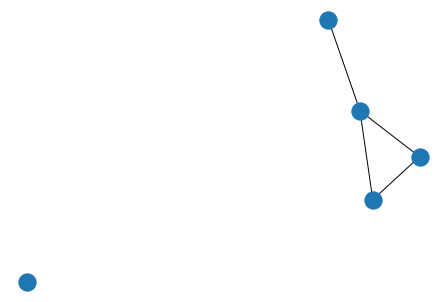

In [7]:
mi_red = {1:{2,3},2:{1,3},3:{1,2,3}, 4:{2}, 5:{}}
G1 = nx.Graph(mi_red)
nx.draw(G1)

### Red G1a

Número de componentes conectados: 1
Proporción del componente gigante: 1.0


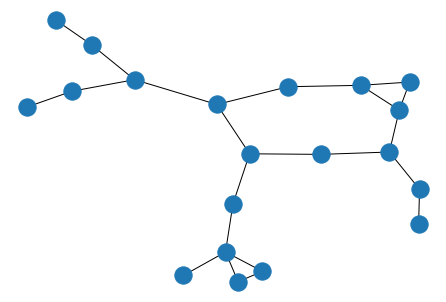

In [8]:
mi_red = {0: {1}, 1: {0, 2}, 2: {1, 2, 5}, 3: {2, 4}, 4: {3}, 5: {2, 6, 14},
          6: {5, 7}, 7: {6, 8, 9}, 8: {7, 9}, 9: {7, 9, 10}, 10: {9, 11, 13},
          11: {10, 12}, 12: {11}, 13: {10, 14}, 14: {5, 15}, 15: {14, 16},
          16: {15, 17, 19}, 17: {16, 18}, 18: {16, 17}, 19: {16}}
G1a = nx.Graph(mi_red)
nx.draw(G1a)
print("Número de componentes conectados: " + str(num_componentes_conectados(G1a)))
print("Proporción del componente gigante: " + str(prop_componente_gigante(G1a, 20)))


### Red G1b

Número de componentes conectados: 1
Proporción del componente gigante: 0.95


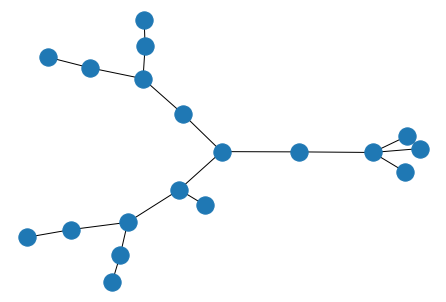

In [9]:
mi_red = {0: {1}, 1: {0, 2}, 2: {1, 2, 5}, 3: {2, 4}, 4: {3}, 5: {2, 6, 14},
          6: {5}, 8: {9}, 9: {9, 10}, 10: {9, 11, 13}, 11: {10, 12}, 12: {11},
          13: {10, 14}, 14: {5, 15}, 15: {14, 16}, 16: {15, 17, 19}, 
          17: {16, 18}, 18: {16, 17}, 19: {16}}
G1b = nx.Graph(mi_red)
nx.draw(G1b)
print("Número de componentes conectados: " + str(num_componentes_conectados(G1b)))
print("Proporción del componente gigante: " + str(prop_componente_gigante(G1b, 20)))

### Red G1c

Número de componentes conectados: 3
Proporción del componente gigante: 0.7


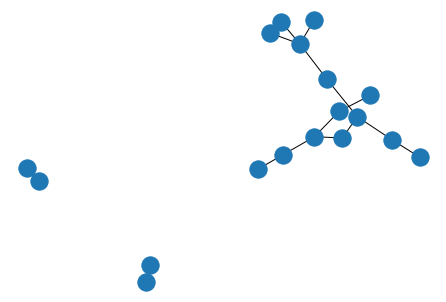

In [10]:
mi_red = {0: {1}, 1: {0}, 3: {4}, 4: {3}, 5: {6, 14}, 6: {5}, 8: {9}, 
          9: {9, 10}, 10: {9, 11, 13}, 11: {10, 12}, 12: {11}, 13: {10, 14},
          14: {5, 15}, 15: {14, 16}, 16: {15, 17, 19}, 17: {16, 18},
          18: {16, 17}, 19: {16}}
G1c = nx.Graph(mi_red)
nx.draw(G1c)
print("Número de componentes conectados: " + str(num_componentes_conectados(G1c)))
print("Proporción del componente gigante: " + str(prop_componente_gigante(G1c, 20)))

### Red G1d


Número de componentes conectados: 5
Proporción del componente gigante: 0.3


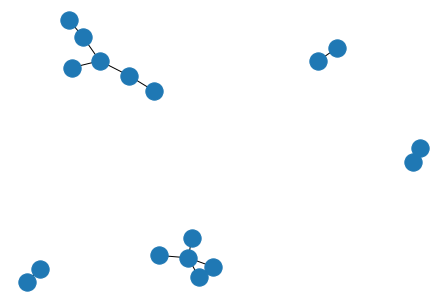

In [11]:
mi_red = {0: {1}, 1: {0}, 3: {4}, 4: {3}, 5: {6}, 6: {5}, 8: {9}, 9: {9, 10},
          10: {9, 11, 13}, 11: {10, 12}, 12: {11}, 13: {10}, 15: {16},
          16: {15, 17, 19}, 17: {16, 18}, 18: {16, 17}, 19: {16}}
G1d = nx.Graph(mi_red)
nx.draw(G1d)
print("Número de componentes conectados: " + str(num_componentes_conectados(G1d)))
print("Proporción del componente gigante: " + str(prop_componente_gigante(G1d, 20)))

### Red 2

Número de componentes conectados: 1
Proporción del componente gigante: 1.0


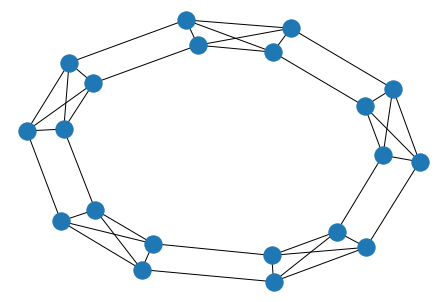

In [33]:
mi_red = {0: {1, 9, 18, 19}, 1: {0, 2, 18, 19}, 2: {1, 3, 16, 17}, 3: {2, 4, 16, 17}, 4: {3, 5, 14, 15}, 5: {4, 6, 14, 15},
          6: {5, 7, 12, 13}, 7: {6, 8, 12, 13}, 8: {7, 9, 10, 11}, 9: {0, 8, 10, 11}, 10: {8, 9, 11, 19}, 11: {8, 9, 10, 12},
          12: {6, 7, 11, 13}, 13: {6, 7, 12, 14}, 14: {4, 5, 13, 15}, 15: {4, 5, 14, 16}, 16: {2, 3, 15, 17},
          17: {2, 3, 16, 18}, 18: {0, 1, 17, 19}, 19: {0, 1, 10, 18}}
G2 = nx.Graph(mi_red)
nx.draw(G2)
print("Número de componentes conectados: " + str(num_componentes_conectados(G2)))
print("Proporción del componente gigante: " + str(prop_componente_gigante(G2, 20)))

Normalizamos las distribuciones

In [34]:
dist_G1a = nx.degree_histogram(G1a)
dist_norm_G1a = [ ]
for i in dist_G1a:
    dist_norm_G1a.append(i / 20)
print(dist_norm_G1a)

dist_G2 = nx.degree_histogram(G2)
dist_norm_G2 = [ ]
for i in dist_G2:
    dist_norm_G2.append(i / 20)
print(dist_norm_G2)

[0.0, 0.2, 0.45, 0.2, 0.05, 0.1]
[0.0, 0.0, 0.0, 0.0, 1.0]


Graficamos las distribuciones y verificamos que el grado medio de ambas redes sea el mismo (utilice la función gráfica_funciones)

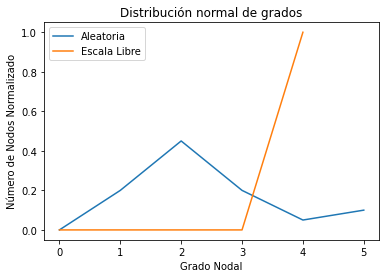

In [35]:
grafica_funciones("Distribución normal de grados", dist_norm_G1a, dist_norm_G2, None, "Aleatoria", "Escala Libre", "Grado Nodal", "Número de Nodos Normalizado"  )

# (Actividad 6) Ejecución de errores secuenciales a la red

Simulamos que ocurren 3 errores en la red que diseñamos. La función random.choice(A) nos permite tomar un elemento al azar de una lista. 

In [36]:
print("Número de componentes conectados: " + str(num_componentes_conectados(G2)))
print("Proporción del componente gigante: " + str(prop_componente_gigante(G2, 20)))

Número de componentes conectados: 1
Proporción del componente gigante: 1.0


Número de componentes conectados: 1
Proporción del componente gigante: 0.95


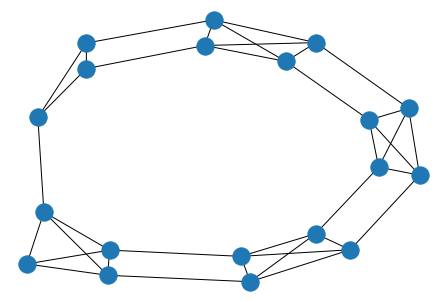

In [37]:
G2_e1 = error(G2)
print("Número de componentes conectados: " + str(num_componentes_conectados(G2_e1)))
print("Proporción del componente gigante: " + str(prop_componente_gigante(G2_e1, 20)))
nx.draw(G2_e1)

Número de componentes conectados: 1
Proporción del componente gigante: 0.9


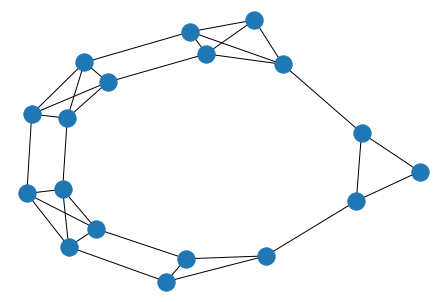

In [38]:
G2_e2 = error(G2_e1)
print("Número de componentes conectados: " + str(num_componentes_conectados(G2_e2)))
print("Proporción del componente gigante: " + str(prop_componente_gigante(G2_e2, 20)))
nx.draw(G2_e2)

Número de componentes conectados: 1
Proporción del componente gigante: 0.85


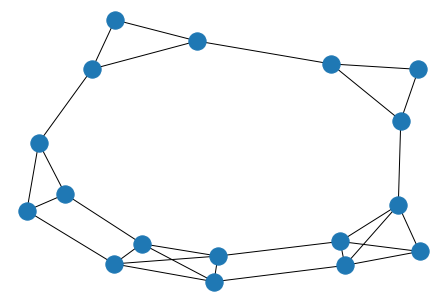

In [39]:
G2_e3 = error(G2_e2)
print("Número de componentes conectados: " + str(num_componentes_conectados(G2_e3)))
print("Proporción del componente gigante: " + str(prop_componente_gigante(G2_e3, 20)))
nx.draw(G2_e3)

Observamos como se reduce el tamaño de componente gigante (utilice la función gráfica_funciones)

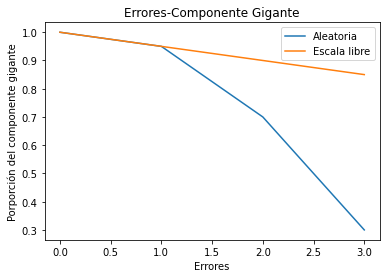

In [43]:
p_gc_G1 = [1.0, 0.95, 0.7, 0.3]
p_gc_G2 = [1.0, 0.95, 0.90, 0.85]
eje_x = [0, 1, 2, 3]

grafica_funciones("Errores-Componente Gigante",p_gc_G1, p_gc_G2, eje_x, "Aleatoria", "Escala libre",
                  "Errores", "Porporción del componente gigante")

Observamos como se incrementa el número de componentes conectados (utilice la función gráfica_funciones)

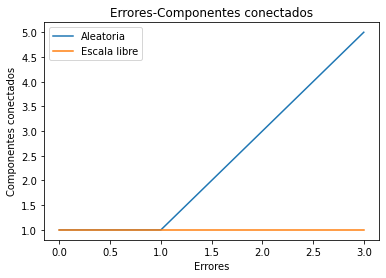

In [44]:
cc_G1 = [1, 1, 3, 5]
cc_G2 = [1, 1, 1, 1]
eje_x = [0, 1, 2, 3]
grafica_funciones("Errores-Componentes conectados",cc_G1, cc_G2, eje_x, "Aleatoria", "Escala libre",
                  "Errores", "Componentes conectados")